In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_accs(fname):
    fin_acc = 0
    with open(fname, 'r') as f:
        for line in f.readlines():
            if 'end model (LeNet) test acc: ' in line:
                fin_acc = float(line.split()[-1])
    return fin_acc

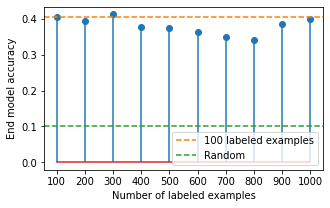

In [3]:
seed = 0

get_acc_npoints = lambda n: parse_accs(
    f'results/mnist/snuba_nlabels/n_labeled_points_{n}/res_seed{seed}.log')

nlabels = np.arange(100, 1100, 100)
npoints = [get_acc_npoints(n) for n in nlabels]

npoints[0] = 0.4037

plt.figure(figsize=(5, 3))

(markerline, stemlines, baseline) = plt.stem(nlabels, npoints)
#plt.setp(baseline, visible=False)
plt.axhline(
    npoints[0], 
    linestyle='--', color='C1', label=f'100 labeled examples')
plt.axhline(
    0.1, 
    linestyle='--', color='C2', label=f'Random')

plt.xticks(nlabels)
plt.ylabel('End model accuracy')
plt.xlabel('Number of labeled examples')

plt.legend(frameon=True, loc='lower right')
plt.savefig('nlabels.pdf', bbox_inches='tight')
plt.show()